### A1: Predicting Car Price
**Task 1** Preparing the datasets - Download the Car Price dataset from Google classroom. Perform
loading, EDA, preprocessing, model selection, · · · , inference. Grade will be given based on the how well
you adhere to best practices. There are some important coding considerations:

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [118]:
#Download Dataset
df = pd.read_csv('Cars.csv')

In [119]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


1.1 For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [121]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [122]:
#rename owner lows
df['owner'].replace({
        'First Owner':1,
        'Second Owner':2,
        'Third Owner':3,
        'Fourth & Above Owner':4,
        'Test Drive Car':5
    }, inplace=True)

In [123]:
df['owner'] = df['owner'].astype(int)

In [124]:
df["owner"].unique()

array([1, 2, 3, 4, 5])

1.2 For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [125]:
#CODE กระจ๋อย
#newCNG = df.where(df["fuel"] == 'CNG')
#newCNG
#selected_rows = newCNG[~newCNG['fuel'].isnull()]
#selected_rows
df_1= df[df['fuel'] != 'CNG']
df_2= df_1[df_1['fuel'] != 'LPG']

In [126]:
df_2["fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

1.3 For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [127]:
df_2['mileage'] = df_2['mileage'].str.split().str[0]
df_2['mileage'] = pd.to_numeric(df_2['mileage'], errors='coerce')

1.4 For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [128]:
df_2['engine'] = df_2['engine'].str.split().str[0]
df_2['engine'] = pd.to_numeric(df_2['engine'], errors='coerce')

1.5 Do the same for max power

In [129]:
df_2['max_power'] = df_2['max_power'].str.split().str[0]
df_2['max_power'] = pd.to_numeric(df_2['max_power'], errors='coerce')

1.6 For the feature brand, take only the first word and remove the rest

In [130]:
df_2['name'] = df_2['name'].str.split().str[0]
df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


1.7 Drop the feature torque, simply because Chaky’s company does not understand well about it

In [131]:
#df.drop(columns=['torque'])
df_2 = df_2.drop('torque', axis=1)
df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [132]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int32  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 784.5+ KB


1.8 You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [133]:
newCar = df_2.where(df["owner"] == 5)
selected_rows = newCar[~newCar['owner'].isnull()]
selected_rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen,2019.0,1350000.0,5400.0,Diesel,Dealer,Manual,5.0,22.27,1498.0,108.60,5.0
4950,Audi,2019.0,6223000.0,7800.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
4951,Audi,2019.0,5923000.0,11500.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
4952,Audi,2019.0,6523000.0,23600.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
6220,Honda,2019.0,2000000.0,24857.0,Petrol,Dealer,Automatic,5.0,16.50,1799.0,139.46,5.0


In [134]:
df_3= df_2[df_2['owner'] != '5']

1.9 Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform, i.e.,

In [135]:
y = np.log(df_3['selling_price'])
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8033, dtype: float64

2.0 During inference/testing, you have to transform your predicted y backed before comparing with y
test, i.e.,

In [136]:
pred_y = np.exp(y)
pred_y

0       450000.0
1       370000.0
2       158000.0
3       225000.0
4       130000.0
          ...   
8123    320000.0
8124    135000.0
8125    382000.0
8126    290000.0
8127    290000.0
Name: selling_price, Length: 8033, dtype: float64

In [137]:
df_3['selling_price'] = np.log(df_3['selling_price'])

In [138]:
df_3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,12.676076,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,11.813030,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,12.853176,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,12.577636,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


### A1: Task 2

**Task 2**. Report - In the end of the notebook, please write a 2-3 paragraphs summary deeply discussing
and analysing the results. Possible points of discussion:

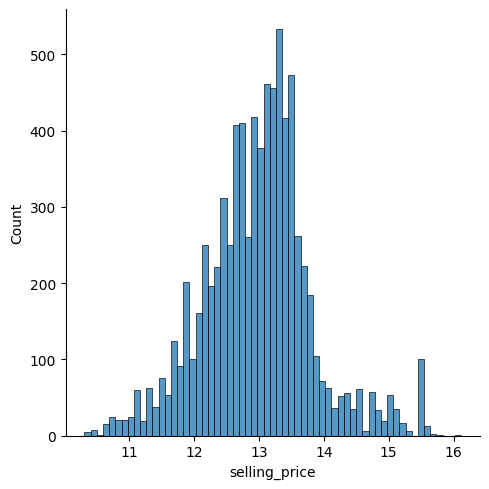

In [139]:
sns.displot(data = df_3, x = 'selling_price')

In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_3["seller_type"] = le.fit_transform(df_3["seller_type"])
#df["selling_price"].unique()
#le.classes_

In [141]:
le.classes_
le.transform(['Dealer', 'Individual', 'Trustmark Dealer'])

array([0, 1, 2])

In [142]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   float64
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   int32  
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int32  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(3)
memory usage: 1011.1+ KB


In [143]:
#ถ้าคิดว่าไม่ใช้ให้ Drop เลย
df_3 = df_3.drop(['fuel', 'transmission','owner','name'],axis=1)

<Axes: >

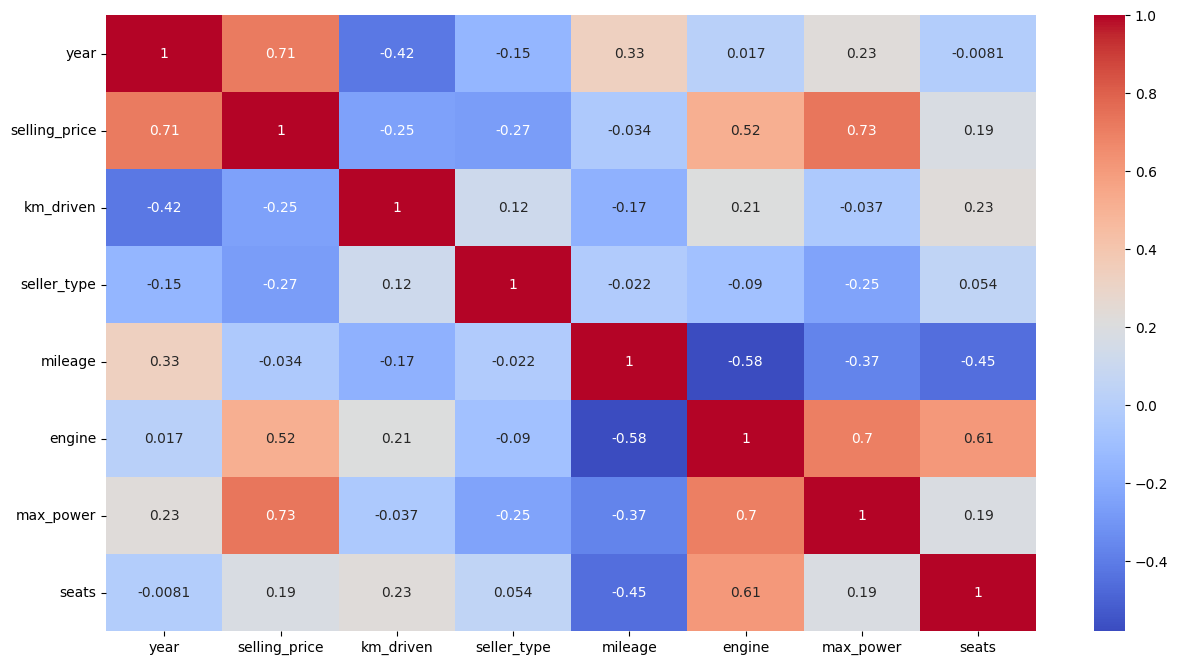

In [144]:
plt.figure(figsize = (15,8))
sns.heatmap(df_3.corr(), annot=True, cmap="coolwarm") 

2.1 Which features are important? Which are not? Why?

ANS: The feature are important are max_power, engine and years. 

you can check the the best feature form ppscore table in below: hight score means very important feature more than low score.

<Axes: xlabel='x', ylabel='y'>

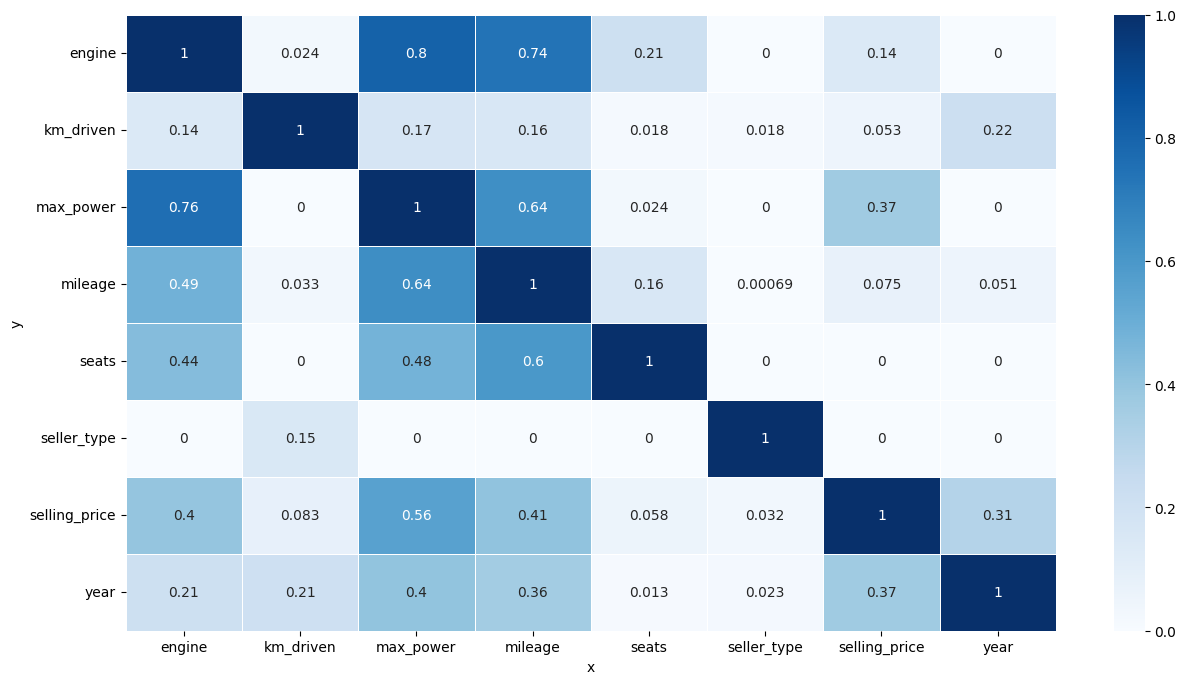

In [145]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df_3.copy()
#dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

2.2 Which algorithm performs well? Which does not? Why? (here, you haven’t learned about any
algorithms yet, but you can search online a bit and start building an intuition)

ANS: I try to compare 4 model (algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]) 
Algorithm is perform well is  Random-Forest Regressor Because this model have the best Mean Score: -0.05946266469462726

In [146]:
from sklearn.model_selection import train_test_split
#x is our strong features
X = df_3[['max_power', 'engine', 'year']]

#y is simply the life expectancy col
y = df_3["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [147]:
#check all the lost number
X_train[['max_power', 'engine', 'year']].isna().sum()

max_power    148
engine       153
year           0
dtype: int64

In [148]:
X_test[['max_power', 'engine', 'year']].isna().sum()

max_power    60
engine       61
year          0
dtype: int64

In [149]:
y_train.isna().sum()

0

In [152]:
X_train['max_power'].

82.0

In [155]:
import pandas as pd


# Calculate the value counts
value_counts = X_train['max_power'].value_counts()

# Get the maximum count
max_count = value_counts.max()

print("Maximum Count:", max_count)
value_counts

Maximum Count: 267


74.00     267
81.80     156
88.50     141
67.00     121
88.70     113
         ... 
68.40       1
174.57      1
139.46      1
86.79       1
265.00      1
Name: max_power, Length: 289, dtype: int64

In [162]:
print(X_train['max_power'].median())
print(X_train['engine'].median())
X_train['year'].mode()

82.0
1248.0


0    2017
Name: year, dtype: int64

In [115]:
#let's fill the training set first!
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

In [35]:
X_train

,max_power,engine,year
1495,62.100000,2523.0,2013
5818,100.000000,1493.0,2012
1281,90.000000,1248.0,2010
1421,90.000000,1396.0,2010
7173,81.830000,1197.0,2015
...,...,...,...
5289,81.800000,1197.0,2014
5456,92.014809,1248.0,2006
865,88.760000,1248.0,2015
7696,46.300000,796.0,2010


In [36]:
X_train[['max_power', 'engine', 'year']].isna().sum()

max_power    0
engine       0
year         0
dtype: int64

In [37]:
X_test['max_power'].fillna(X_test['max_power'].mean(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['year'].fillna(X_test['year'].median(), inplace=True)

In [38]:
X_test[['max_power', 'engine', 'year']].isna().sum()

max_power    0
engine       0
year         0
dtype: int64

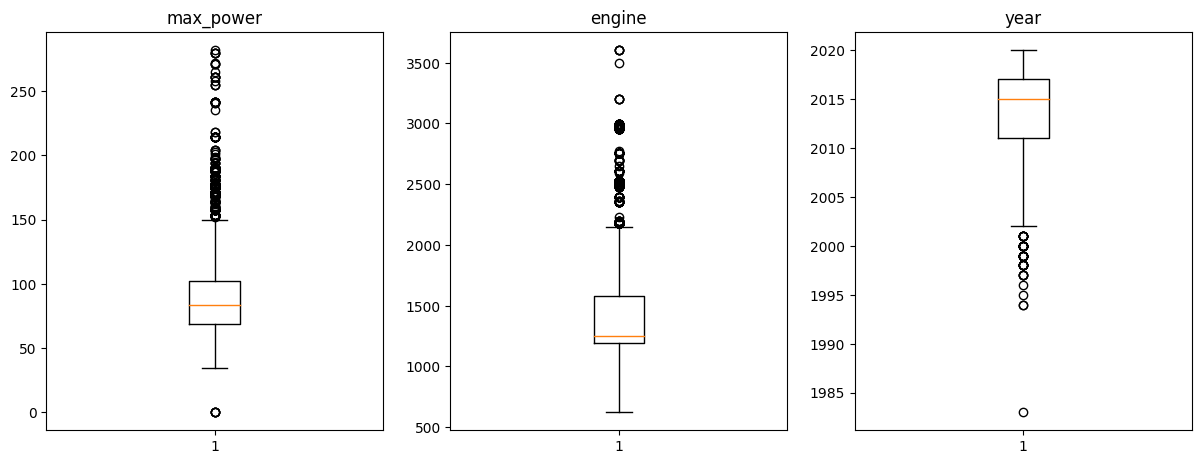

In [39]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'engine':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [40]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [41]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [42]:
X_test

array([[-0.00891658, -0.42642682, -0.93943251],
       [-0.28365698, -0.52809398,  0.29755442],
       [-0.70738033, -0.92479525,  0.29755442],
       ...,
       [-0.62354202, -0.68159146,  0.05015704],
       [-1.04273357, -1.29159441,  0.7923492 ],
       [-0.19868572, -0.32675314, -3.66080377]])

In [43]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5623, 3)
Shape of X_test:  (2410, 3)
Shape of y_train:  (5623,)
Shape of y_test:  (2410,)


In [44]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.10283719225004369
r2:  0.8510697885496521


In [45]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [46]:
y_train.isna().sum()

0

In [47]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.10282004 -0.10722114 -0.09913633 -0.12644483 -0.10993199]; Mean: -0.10911086688138791


SVR - Score: [-0.08474944 -0.08461616 -0.08500718 -0.08255176 -0.08483882]; Mean: -0.08435267002898307
KNeighbors Regressor - Score: [-0.07195899 -0.06151319 -0.06092499 -0.0626542  -0.07283485]; Mean: -0.06597724382007078
Decision-Tree Regressor - Score: [-0.07905179 -0.07633301 -0.07162682 -0.06921874 -0.07437664]; Mean: -0.07412140071031206
Random-Forest Regressor - Score: [-0.0569342  -0.06192221 -0.05500231 -0.06555881 -0.05232714]; Mean: -0.058348933744553376


### A1: Task 3


**Task 3** :Deployment - Develop a web-based application that contains the model. Here you will be
tasked to self-study how to deploy the model into production.

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [49]:
grid.predict([[-8.47299673e-01,  2.11525216e+00, -1.97240350e-01]])

array([13.02489296])

In [50]:
ans = scaler.transform([[79,1024,2014]])

In [51]:
def conv(inp) :
    ans = scaler.transform([inp])
    pric = np.exp(grid.predict(ans))
    return pric.item()
    

In [52]:
conv([74,1248,2014])

464055.9637601778

In [53]:
import pickle 
pickle.dump(scaler , open('standard.pkl', 'wb'))



In [54]:
df_1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [55]:
X_train

array([[-8.47299673e-01,  2.11525216e+00, -1.97240350e-01],
       [ 2.26170576e-01,  6.19742367e-02, -4.44637737e-01],
       [-5.70669568e-02, -4.26426823e-01, -9.39432511e-01],
       ...,
       [-9.21884108e-02, -4.26426823e-01,  2.97554425e-01],
       [-1.29481497e+00, -1.32747694e+00, -9.39432511e-01],
       [ 4.02504743e-16, -4.26426823e-01, -9.39432511e-01]])

In [56]:
a = np.array([[-0.55530184,  2.08427828,  0.28456336]])

In [57]:
a

array([[-0.55530184,  2.08427828,  0.28456336]])

In [58]:
X_train[0].reshape(1, -1)

array([[-0.84729967,  2.11525216, -0.19724035]])

In [59]:
np.exp(grid.predict(X_train[2].reshape(1, -1)))

array([222908.65107502])

In [60]:
np.exp(y_train)

1495    400000.0
5818    300000.0
1281    190000.0
1421    215000.0
7173    430000.0
          ...   
5289    300000.0
5456    170000.0
865     750000.0
7696    190000.0
7361    352000.0
Name: selling_price, Length: 5623, dtype: float64

In [61]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 15}

In [62]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.05099265232757677

In [63]:
import pickle

# save the model to disk
filename = 'price_predict.model'
pickle.dump(grid, open(filename, 'wb'))

In [64]:
loaded_model = pickle.load(open(filename, 'rb'))

In [65]:
#Reshape name always to do this when code is bug
loaded_model.predict(X_train[2].reshape(1, -1))

array([12.31451733])

In [66]:
np.array([1,2,3]).reshape(1, -1)

array([[1, 2, 3]])

In [67]:
np.array([1,2,3]).reshape(1, -1).shape

(1, 3)

In [68]:
X_train[0].shape

(3,)

In [69]:
X_train[0].reshape(1,-1).shape

(1, 3)

In [70]:
grid.predict(X_train[0].reshape(1,-1))

array([13.02489296])

In [71]:
df_3.head()

,year,selling_price,km_driven,seller_type,mileage,engine,max_power,seats
0,2014,13.017003,145500,1,23.40,1248.0,74.00,5.0
1,2014,12.821258,120000,1,21.14,1498.0,103.52,5.0
2,2006,11.970350,140000,1,17.70,1497.0,78.00,5.0
3,2010,12.323856,127000,1,23.00,1396.0,90.00,5.0
4,2007,11.775290,120000,1,16.10,1298.0,88.20,5.0


In [72]:
#colaum to predict [max_power, engine, year]
#check the answer is []
X_train = scaler.fit_transform(np.array([10254,6464,2014]).reshape(1, -1))


In [73]:
grid.predict(X_train)

array([13.1710469])